In [1]:
library(scran)
library(tidyverse)
library(scater)
library(patchwork)
library(tricycle)
library(monocle3)
library(pracma)

Loading required package: SingleCellExperiment

Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts, rowCummaxs, rowCummins, rowCumprods,
    rowCumsums, rowDiffs, rowIQRDiffs, rowIQRs, rowLogSumExps,
    rowMadDiffs, rowMads, rowMaxs, rowMeans2, rowMedians, rowMins,
    

In [2]:
source("src/myMonocle.R")
cm <- readRDS("src/sce_subset.rds")
metadata <- read.delim("src/metadata_subset.tsv")
metadata$diffday <- ordered(metadata$diffday,levels=c(
  "day0", "day1", "day3", "day5", "day7", "day11", "day15")
)
rownames(metadata) <- metadata$cell

In [3]:
dim(counts(cm)) # genes by cells

[1] 21971 10000

In [4]:
X <- t(counts(cm))
cds_full <- myMonocle(cm, metadata)
pt_full  <- as.numeric(pseudotime(cds_full))

The designated dimred do not exist in the SingleCellExperiment or in altexp. project_cycle_space will be run to calculate embedding tricycleEmbedding

No custom reference projection matrix provided. The ref learned from mouse Neuroshpere data will be used.

The number of projection genes found in the new data is 478.

Aligning cells from different batches using Batchelor.
Please remember to cite:
	 Haghverdi L, Lun ATL, Morgan MD, Marioni JC (2018). 'Batch effects in single-cell RNA-sequencing data are corrected by matching mutual nearest neighbors.' Nat. Biotechnol., 36(5), 421-427. doi: 10.1038/nbt.4091

No preprocess_method specified, and aligned coordinates have been computed previously. Using preprocess_method = 'Aligned'



  |======================================================================| 100%


In [5]:
pt_full 

[1] 3.013108e+00 2.129495e+00 2.994535e+01 1.378904e+01 2.994535e+01
    [6] 2.243469e+01 2.696321e+00 7.148363e+00 2.575210e+01 7.827954e+00
   [11] 3.240881e+00 2.227635e+01 5.371482e+00 5.371482e+00 1.728425e+01
   [16] 2.895199e-05 1.682016e+01 7.336567e+00 5.371482e+00 1.667077e+00
   [21] 1.682687e+00 2.994536e+01 7.333901e+00 1.081070e+01 1.081070e+01
   [26] 2.994536e+01 5.821605e+00 1.127176e+01 1.349211e+01 4.678200e+00
   [31] 2.994536e+01 2.243469e+01 8.409766e+00 1.349211e+01 1.244294e+01
   [36] 5.408594e+00 1.977326e+01 1.166639e+01 2.767823e+01 2.502696e+01
   [41] 1.369255e+01 7.827954e+00 3.853845e+00 1.676149e+00 2.994536e+01
   [46] 2.994536e+01 2.497242e+01 1.166639e+01 2.137166e+00 3.624070e+00
   [51] 5.371483e+00 1.151477e+01 9.679143e+00 4.383692e+00 1.349211e+01
   [56] 1.349211e+01 9.325107e+00 9.703510e+00 7.827954e+00 7.827955e+00
   [61] 9.928401e+00 1.191497e+00 5.106907e-02 7.827955e+00 1.701390e+01
   [66] 6.443856e+00 1.761530e+01 1.077462e+01 1.728425e+01 4.108061e+00
   [71] 9.899366e+00 2.871851e-05 2.910804e+01 2.981295e+00 7.037724e+00
   [76] 7.905953e+00 2.762837e+01 9.994789e+00 3.349716e+00 2.848503e-05
   [81] 1.739906e+01 1.349211e+01 3.811049e+00 1.882928e+01 2.825154e-05
   [86] 2.453736e+01 6.410001e-02 1.630491e+01 8.695146e+00 8.089075e-01
   [91] 8.559622e-01 2.268370e+01 1.618904e+01 2.384198e+00 1.701390e+01
   [96] 4.662017e+00 2.801806e-05 1.701390e+01 1.166639e+01 1.964568e+01
  [101] 9.503076e+00 9.883095e+00 1.025983e+00 7.840772e+00 1.865684e+01
  [106] 7.046208e+00 4.046366e+00 1.711168e+01 9.679143e+00 1.825661e+01
  [111] 1.825396e+01 2.927590e+00 4.678777e+00 2.243469e+01 1.682688e+00
  [116] 5.506567e+00 7.084585e+00 6.997857e+00 2.117757e+01 1.701390e+01
  [121] 2.038335e+01 1.128387e+01 1.313014e-01 9.786201e+00 7.827955e+00
  [126] 2.778458e-05 2.571539e+01 2.792272e+01 2.321348e+01 2.910804e+01
  [131] 2.206384e+01 1.081070e+01 1.682688e+00 1.827819e+01 1.672482e+00
  [136] 1.871708e+01 2.412654e+01 2.346025e+01 9.486941e-01 1.701390e+01
  [141] 2.544427e+01 3.635247e+00 9.816793e+00 2.203999e+01 2.175997e+01
  [146] 8.396444e+00 2.994536e+01 1.828229e+01 1.489283e+01 2.012209e+01
  [151] 1.712983e+01 7.827955e+00 9.893410e+00 9.285668e-01 8.344151e+00
  [156] 7.630334e+00 1.062137e+01 1.757110e+01 1.088139e+01 7.646713e+00
  [161] 4.762885e+00 9.747276e+00 8.280158e+00 2.555114e+01 1.052361e+01
  [166] 2.790195e+00 2.994536e+01 2.574946e+01 9.888917e+00 7.459984e+00
  [171] 2.549644e+01 5.375798e+00 1.166639e+01 2.078866e+00 2.332876e+01
  [176] 5.407326e+00 4.705845e+00 1.961463e+01 1.349211e+01 7.180397e+00
  [181] 1.067993e+01 1.166639e+01 8.998613e+00 1.666055e+00 2.499308e+01
  [186] 2.857426e+01 2.236286e+01 7.746613e+00 6.160649e+00 7.591391e+00
  [191] 1.127220e+01 5.421509e+00 7.827956e+00 5.793150e+00 1.716607e+01
  [196] 2.200075e+01 6.753262e+00 9.870820e+00 6.181002e+00 9.987761e+00
  [201] 9.679144e+00 2.994536e+01 8.386935e+00 7.827956e+00 7.272944e-01
  [206] 1.179228e+00 2.384013e+00 7.827956e+00 2.754071e+01 1.413207e+01
  [211] 2.994536e+01 1.123862e+01 1.308996e+01 7.136289e+00 7.072529e+00
  [216] 9.883217e+00 7.769713e+00 2.243469e+01 1.132858e+01 2.572911e+01
  [221] 2.119933e+01 1.865684e+01 2.769924e+01 1.262263e+01 5.821605e+00
  [226] 8.365987e+00 2.203971e+01 9.679144e+00 9.088037e+00 3.349717e+00
  [231] 2.996914e+01 2.996516e+01 1.757110e+01 3.630995e+00 2.268370e+01
  [236] 7.180397e+00 7.827956e+00 2.762252e+01 1.077997e+01 1.869862e+01
  [241] 9.486943e-01 7.056721e+00 1.166639e+01 2.365152e+01 9.486945e-01
  [246] 9.186877e-01 2.485242e+01 2.994536e+01 4.364158e+00 1.136167e+01
  [251] 6.168146e+00 2.764636e+00 1.166639e+01 2.852193e+01 7.827956e+00
  [256] 2.439265e+00 6.557680e-01 2.994536e+01 8.570735e+00 1.712309e+01
  [261] 2.904381e+00 2.755109e-05 1.701390e+01 1.305983e+01 1.878364e+01
  [266] 2.023217e+01 6.557683e-01 2.731761e-05 9.679144e+00 1.716008e+01
  [271] 5.453910e+00 1.728425e+01 3.585034e+00 2.575754e+01 1.

In [6]:
lib.sf.cm <- librarySizeFactors(cm)
sizeFactors(cm) <- lib.sf.cm
cm <- logNormCounts(cm)
dec.cm <- modelGeneVar(cm)
hvg.cm.var <- getTopHVGs(dec.cm, fdr.threshold=0.05)[1:2500]

In [7]:
lib.sf.cm

E1_E1CD3col4_CATTTGTGCTTG E1_E1CD3col2_AGAATAAGTCAC E2_E2CD2col5_ATGAATGATGAA 
                4.8407164                 3.5141382                 0.2323520 
E2_E2CD1col1_TGACGCGCCGGT E1_E1CD2col5_AGATAATCCCAA E3_E3CD2col4_TTGCACGCCTAC 
                0.1645207                 0.7601273                 0.6414224 
E1_E1CD3col4_CCGCGAGAGCTG E2_E2CD1col1_GCGCCGACTGAA E2_E2CD2col6_ATGTGTTATTTC 
                2.3369079                 1.2230462                 1.0412702 
E3_E3CD1col6_TTGCTGAACTAA E1_E1CD3col4_CTATAATTGTAA E3_E3CD3col4_GCATGCGTACGC 
                0.1921887                 0.6438025                 0.5262877 
E1_E1CD3col3_GCGCCAATTGCT E1_E1CD3col2_CAACCCGCGCTT E1_E1CD1col3_CCTAGAGCAATA 
                0.5292628                 2.1839899                 0.5102224 
E3_E3CD3col3_AGAGAGTGATAT E3_E3CD1col4_ACGCGAGTATCA E2_E2CD3col2_CTGCGTGGTTGC 
                0.1737434                 0.9633237                 2.2122529 
E3_E3CD2col2_AGAGAATCCTCA E3_E3CD3col4_GCCCACTAAGTG E1_E1CD3col5_AGCACTATTTTA 
                0.3079185                 1.9995363                 3.6013074 
E2_E2CD2col6_GGCGCCGAAAAG E2_E2CD1col3_ATGTTTTTTTCT E2_E2CD1col4_CCGATCATGACT 
                0.6577853                 0.2531774                 1.4446880 
E2_E2CD1col1_TTTAGCCGACCC E2_E2CD2col4_AATCCGCCATAG E2_E2CD3col5_CGCTAGATGCTA 
                0.1332826                 0.8467014                 4.6158021 
E1_E1CD1col4_GGGTTGGCCTCT E1_E1CD1col1_AACACGGAACTC E2_E2CD3col3_GAGCGTAATTAT 
                0.5857889                 0.6345798                 1.3456186 
E1_E1CD2col2_CGGTGCTCTCCT E3_E3CD2col6_TCCGACTGGGGC E1_E1CD1col1_AAAAGGAGTAAA 
                0.5236102                 0.2659702                 2.2598539 
E1_E1CD3col4_CAAAATTATTTG E1_E1CD1col6_CTGCCAGAACAC E2_E2CD3col2_CTTCCGGCTATA 
                0.3897326                 1.4265402                 4.3655997 
E2_E2CD1col4_AAATGAAGGAAT E1_E1CD1col4_TAGGCAGCAGAA E1_E1CD3col4_GGTGCGTAACCA 
                2.0489223                 0.6455875                 0.7369218 
E2_E2CD2col5_GCCCCACGGATA E3_E3CD3col2_AAGCCCCTGCAA E1_E1CD3col2_ACGTGGCCCAGG 
                0.5825163                 0.1558930                 0.2198568 
E3_E3CD3col2_TAGTTTTCCATC E1_E1CD3col4_GGTGCGAACGGC E1_E1CD2col5_GCTGTATGTACC 
                1.4667035                 0.4944546                 0.4486387 
E1_E1CD2col3_CCGCACTGTATC E2_E2CD2col7_CTCCGCGGCCGA E1_E1CD1col1_TTCGCAGTTGTA 
                0.2784654                 0.1924862                 1.3015878 
E2_E2CD3col7_ACTGCTGTTCTG E1_E1CD3col1_TGACTTGACTTC E3_E3CD2col1_CCCGCAACTTAT 
                0.6089943                 0.3635521                 2.2812743 
E2_E2CD1col5_GCCAAATAAAAG E1_E1CD1col4_TTCCAGTCATTA E1_E1CD3col1_AACTGAATATTG 
                1.1602725                 0.4397135                 0.4504237 
E1_E1CD1col1_CCCGTTGAGTTC E1_E1CD2col1_TGATTGCGGGTG E2_E2CD1col3_CTAATTTGTGCC 
                1.5065692                 0.2362196                 1.4699760 
E2_E2CD1col2_TTCGCGCAACAA E3_E3CD3col1_AGCTACCGGCTT E2_E2CD1col3_AGATAGGCACCA 
                0.5081399                 0.3111910                 0.1306050 
E1_E1CD1col2_GCTGAGCATAAA E3_E3CD3col6_CCAGCTTTGTCA E2_E2CD3col6_TTGACTTCTCCG 
                1.2638045                 2.5276091                 0.5786487 
E3_E3CD1col1_GTAGGCCCGCTC E2_E2CD1col4_GCCCGCGAGTCC E2_E2CD3col6_CCATTTTCCCGT 
                0.4602414                 1.8561385                 2.8855085 
E2_E2CD1col4_TTGGCTGACAAC E2_E2CD1col1_TAGAGGAGGCTG E1_E1CD1col2_CCCAGCATATTA 
                1.3066454                 2.0194692                 0.5322378 
E2_E2CD3col5_GTCATTTATGGA E1_E1CD1col5_CGCATCCCAATC E3_E3CD3col3_ATGCAAGCGTCA 
                4.9525786                 1.2941501                 0.6298197 
E2_E2CD2col4_ATCAAGCATGGG E2_E2CD1col4_GCCTAGGGCGTC E2_E2CD3col3_GTATAACAACTG 
                1.0734008                 1.5702355                 1.5363198 
E3_E3CD1col1_ATCTAATGGACT E1_E1CD3col3_ACGGCATCGAA

In [8]:
var(lib.sf.cm)

[1] 0.8006243

In [9]:
# counts of cm is genes by cells
colSums((counts(cm)))

E1_E1CD3col4_CATTTGTGCTTG E1_E1CD3col2_AGAATAAGTCAC E2_E2CD2col5_ATGAATGATGAA 
                    16271                     11812                       781 
E2_E2CD1col1_TGACGCGCCGGT E1_E1CD2col5_AGATAATCCCAA E3_E3CD2col4_TTGCACGCCTAC 
                      553                      2555                      2156 
E1_E1CD3col4_CCGCGAGAGCTG E2_E2CD1col1_GCGCCGACTGAA E2_E2CD2col6_ATGTGTTATTTC 
                     7855                      4111                      3500 
E3_E3CD1col6_TTGCTGAACTAA E1_E1CD3col4_CTATAATTGTAA E3_E3CD3col4_GCATGCGTACGC 
                      646                      2164                      1769 
E1_E1CD3col3_GCGCCAATTGCT E1_E1CD3col2_CAACCCGCGCTT E1_E1CD1col3_CCTAGAGCAATA 
                     1779                      7341                      1715 
E3_E3CD3col3_AGAGAGTGATAT E3_E3CD1col4_ACGCGAGTATCA E2_E2CD3col2_CTGCGTGGTTGC 
                      584                      3238                      7436 
E3_E3CD2col2_AGAGAATCCTCA E3_E3CD3col4_GCCCACTAAGTG E1_E1CD3col5_AGCACTATTTTA 
                     1035                      6721                     12105 
E2_E2CD2col6_GGCGCCGAAAAG E2_E2CD1col3_ATGTTTTTTTCT E2_E2CD1col4_CCGATCATGACT 
                     2211                       851                      4856 
E2_E2CD1col1_TTTAGCCGACCC E2_E2CD2col4_AATCCGCCATAG E2_E2CD3col5_CGCTAGATGCTA 
                      448                      2846                     15515 
E1_E1CD1col4_GGGTTGGCCTCT E1_E1CD1col1_AACACGGAACTC E2_E2CD3col3_GAGCGTAATTAT 
                     1969                      2133                      4523 
E1_E1CD2col2_CGGTGCTCTCCT E3_E3CD2col6_TCCGACTGGGGC E1_E1CD1col1_AAAAGGAGTAAA 
                     1760                       894                      7596 
E1_E1CD3col4_CAAAATTATTTG E1_E1CD1col6_CTGCCAGAACAC E2_E2CD3col2_CTTCCGGCTATA 
                     1310                      4795                     14674 
E2_E2CD1col4_AAATGAAGGAAT E1_E1CD1col4_TAGGCAGCAGAA E1_E1CD3col4_GGTGCGTAACCA 
                     6887                      2170                      2477 
E2_E2CD2col5_GCCCCACGGATA E3_E3CD3col2_AAGCCCCTGCAA E1_E1CD3col2_ACGTGGCCCAGG 
                     1958                       524                       739 
E3_E3CD3col2_TAGTTTTCCATC E1_E1CD3col4_GGTGCGAACGGC E1_E1CD2col5_GCTGTATGTACC 
                     4930                      1662                      1508 
E1_E1CD2col3_CCGCACTGTATC E2_E2CD2col7_CTCCGCGGCCGA E1_E1CD1col1_TTCGCAGTTGTA 
                      936                       647                      4375 
E2_E2CD3col7_ACTGCTGTTCTG E1_E1CD3col1_TGACTTGACTTC E3_E3CD2col1_CCCGCAACTTAT 
                     2047                      1222                      7668 
E2_E2CD1col5_GCCAAATAAAAG E1_E1CD1col4_TTCCAGTCATTA E1_E1CD3col1_AACTGAATATTG 
                     3900                      1478                      1514 
E1_E1CD1col1_CCCGTTGAGTTC E1_E1CD2col1_TGATTGCGGGTG E2_E2CD1col3_CTAATTTGTGCC 
                     5064                       794                      4941 
E2_E2CD1col2_TTCGCGCAACAA E3_E3CD3col1_AGCTACCGGCTT E2_E2CD1col3_AGATAGGCACCA 
                     1708                      1046                       439 
E1_E1CD1col2_GCTGAGCATAAA E3_E3CD3col6_CCAGCTTTGTCA E2_E2CD3col6_TTGACTTCTCCG 
                     4248                      8496                      1945 
E3_E3CD1col1_GTAGGCCCGCTC E2_E2CD1col4_GCCCGCGAGTCC E2_E2CD3col6_CCATTTTCCCGT 
                     1547                      6239                      9699 
E2_E2CD1col4_TTGGCTGACAAC E2_E2CD1col1_TAGAGGAGGCTG E1_E1CD1col2_CCCAGCATATTA 
                     4392                      6788                      1789 
E2_E2CD3col5_GTCATTTATGGA E1_E1CD1col5_CGCATCCCAATC E3_E3CD3col3_ATGCAAGCGTCA 
                    16647                      4350                      2117 
E2_E2CD2col4_ATCAAGCATGGG E2_E2CD1col4_GCCTAGGGCGTC E2_E2CD3col3_GTATAACAACTG 
                     3608                      5278                      5164 
E3_E3CD1col1_ATCTAATGGACT E1_E1CD3col3_ACGGCATCGAA

In [10]:
mean(lib.sf.cm)

[1] 1

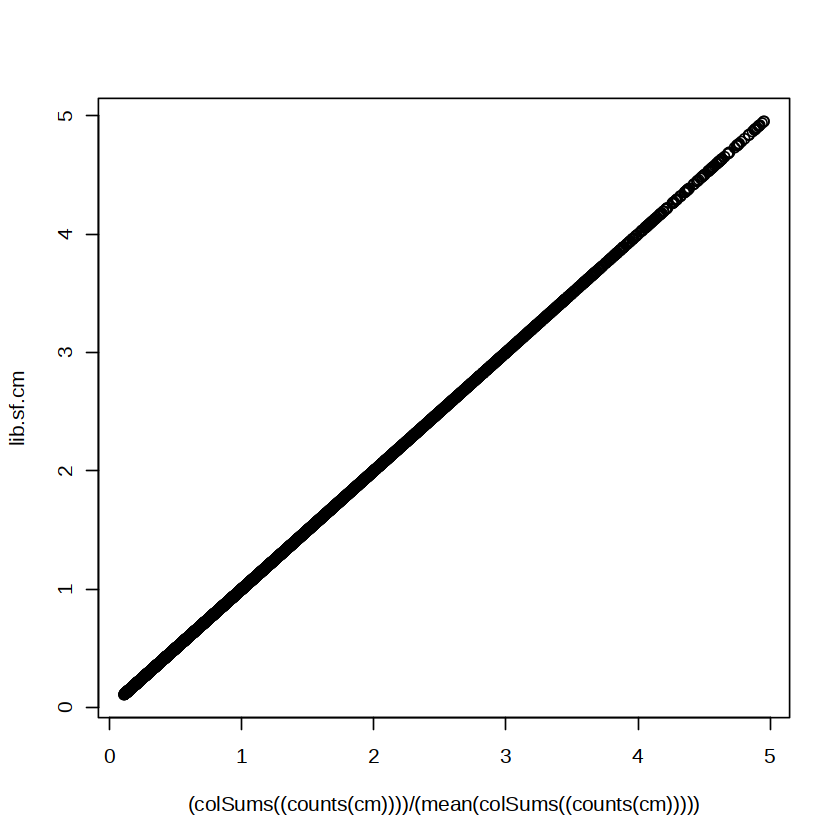

In [11]:
#just the cell counts per cell divided by mean 
plot((colSums((counts(cm))))/(mean(colSums((counts(cm))))), 
     lib.sf.cm)

In [12]:
hvg.cm.var

[1] "TPM1"           "MALAT1"         "EMC10"          "MYL7"          
   [5] "VIM"            "HIST1H4C"       "TMSB4X"         "ANKRD1"        
   [9] "TNNT2"          "L1TD1"          "MYH6"           "HIST1H1D"      
  [13] "MIR302CHG"      "ACTC1"          "TTN"            "MT-RNR1"       
  [17] "AC020909.2"     "MT-ND4L"        "TAGLN"          "MYL4"          
  [21] "TNNI1"          "MT-CYB"         "MT-ND5"         "MDK"           
  [25] "MT-ND4"         "NEBL"           "CENPF"          "HIST1H1E"      
  [29] "MT-CO3"         "CRABP2"         "LINC01356"      "KRT18"         
  [33] "LINC00458"      "MT-CO2"         "CALD1"          "SERPINE2"      
  [37] "S100A10"        "PTMA"           "NEXN"           "TOP2A"         
  [41] "MT-ATP6"        "TUBB2B"         "MTCO1P12"       "MT-ND1"        
  [45] "MT-CO1"         "TERF1"          "PRDX1"          "HSPB1"         
  [49] "HAPLN1"         "HMGB2"          "RHOBTB3"        "KRT8"          
  [53] "KRT19"          "RGS5"           "MTND1P23"       "ACTA2"         
  [57] "NPPA"           "COL3A1"         "SFRP1"          "BNIP3"         
  [61] "GPC3"           "HAS2"           "LIX1"           "GAS5"          
  [65] "MT-ND2"         "NTS"            "TECRL"          "CER1"          
  [69] "MYL6"           "NPPB"           "CCDC34"         "CALM1"         
  [73] "ID2"            "UBE2C"          "VCAN"           "DPPA4"         
  [77] "MTRNR2L1"       "GAL"            "MTRNR2L8"       "MYL3"          
  [81] "SNHG5"          "CSRP2"          "ID3"            "ESRG"          
  [85] "TNNC1"          "UCHL1"          "RPS12"          "PLN"           
  [89] "MYL9"           "TPM2"           "MEIS2"          "ACTA1"         
  [93] "CNTNAP2"        "MIXL1"          "COL1A2"         "AKAP12"        
  [97] "MT-TS2"         "FILIP1"         "GPM6A"          "SMPX"          
 [101] "RPL22L1"        "FN1"            "DUSP6"          "H1F0"          
 [105] "CD24"           "TUBB2A"         "GATA6-AS1"      "PTN"           
 [109] "CTSV"           "DSP"            "EPCAM"          "HAND1"         
 [113] "SPARC"          "LRRC75A"        "ID1"            "WSB1"          
 [117] "TUBA1A"         "PRTG"           "SFRP2"          "COL1A1"        
 [121] "CADM1"          "TMEM88"         "TRIM55"         "CCN2"          
 [125] "CDH11"          "BEX1"           "APLNR"          "PRSS23"        
 [129] "MKI67"          "PTPN13"         "PALLD"          "NRP2"          
 [133] "DGKI"           "CRABP1"         "SVIL"           "IFITM1"        
 [137] "SAT1"           "IGFBP3"         "CENPE"          "CMYA5"         
 [141] "NES"            "POLR3G"         "MEF2C"          "TTC3"          
 [145] "CCDC80"         "PKP2"           "SORBS2"         "TGFB2"         
 [149] "DKK4"           "CDH2"           "LMOD1"          "ACTN2"         
 [153] "NID2"           "PPP1R12B"       "LUM"            "KIFAP3"        
 [157] "MYOCD"          "PCOLCE"         "CCN1"           "TSC22D1"       
 [161] "ZNF608"         "MT-TP"          "PCDH7"          "COL2A1"        
 [165] "PDLIM5"         "LHX1"           "KCNQ1OT1"       "MEF2A"         
 [169] "CGNL1"          "SLC8A1"         "CSRP3"          "GADD45A"       
 [173] "TERF2IP"        "LBH"            "FBN2"           "EMP2"          
 [177] "IRX3"           "CXCL14"         "AL359976.1"     "BMP4"          
 [181] "PDGFRA"         "BST2"           "FILIP1L"        "TXNIP"         
 [185] "HACD1"          "PBX3"           "CCDC141"        "MT-TV"         
 [189] "CPE"            "PALM2-AKAP2"    "AC007098.1"     "BMP2"          
 [193] "CAVIN1"         "TRDN"           "DKK1"           "ANXA1"         
 [197] "IFI16"          "MTND4P12"       "BMP5"           "CTSB"          
 [201] "DLK1"           "RGS4"           "WNT5A"          "MT1G"          
 [205] "CAP2"           "FGF10"          "ENO3"           "IGFBP5"        
 [209] "DAB2"           "CRIP2"          "GUCY1A1"        "ALPK2"         
 [213] "BTG1"           "HRC

In [13]:
# cells by highly variable genes 
X <- t(counts(cm))[, hvg.cm.var]
sfs <-lib.sf.cm
# number of features
p <- ncol(X)

In [14]:
if (!file.exists("res/overdisps.rds") | !file.exists("res/pred_means.rds")){
    overdisps <- data.frame(matrix(NA, nrow=p, ncol=2))
    names(overdisps) <- c("means",  "nb1")
    pred_means <- X

    for (i in 1:p) {
      overdisps[i,1] <- mean(X[,i])
      ### Based on this stack overflow thread, I am almost positive that theta is b, not
      ### 1/b. https://stats.stackexchange.com/questions/10419/what-is-theta-in-a-negative-binomial-regression-fitted-with-r
      try1 <- try(mod <- MASS::glm.nb(X[,i]~pt_full+offset(log(sfs))))
      if (class(try1) != "try-error") {
        overdisps[i,2] <- mod$theta
        pred_means[,i] <- predict(mod, type="response")
      }
    }
    saveRDS(overdisps,  "res/overdisps.rds")
    saveRDS(pred_means, "res/pred_means.rds")
}
overdisps  = readRDS("res/overdisps.rds")
pred_means = readRDS("res/pred_means.rds")

Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message:
“step size truncated due to divergence”


Error in glm.fitter(x = X, y = Y, w = w, etastart = eta, offset = offset,  : 
  NA/NaN/Inf in 'x'


Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message:
“step size truncated due to divergence”


Error in glm.fitter(x = X, y = Y, w = w, etastart = eta, offset = offset,  : 
  NA/NaN/Inf in 'x'


Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message:
“step size truncated due to divergence”


Error in glm.fitter(x = X, y = Y, w = w, etastart = eta, offset = offset,  : 
  NA/NaN/Inf in 'x'


Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message:
“step size truncated due to divergence”


Error in glm.fitter(x = X, y = Y, w = w, etastart = eta, offset = offset,  : 
  NA/NaN/Inf in 'x'


Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”


Error in glm.fitter(x = X, y = Y, w = w, etastart = eta, offset = offset,  : 
  NA/NaN/Inf in 'x'


Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”


Error in glm.fitter(x = X, y = Y, w = w, etastart = eta, offset = offset,  : 
  NA/NaN/Inf in 'x'


Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”


Error in glm.fitter(x = X, y = Y, w = w, etastart = eta, offset = offset,  : 
  NA/NaN/Inf in 'x'


Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message:
“step size truncated due to divergence”
Warning message:
“step size truncated due to divergence”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: algorithm did not converge”
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in sqrt(1/i):
“NaNs produced”
Warning message:
“glm.fit: algorithm did not converge”
Warning message in theta.ml(Y, mu, sum(w), w, limit = 

Error : no valid set of coefficients has been found: please supply starting values


Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message:
“step size truncated due to divergence”


Error in glm.fitter(x = X, y = Y, w = w, etastart = eta, offset = offset,  : 
  NA/NaN/Inf in 'x'


Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”


Error in glm.fitter(x = X, y = Y, w = w, etastart = eta, offset = offset,  : 
  NA/NaN/Inf in 'x'


Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”


Error : no valid set of coefficients has been found: please supply starting values


Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”


Error in glm.fitter(x = X, y = Y, w = w, etastart = eta, offset = offset,  : 
  NA/NaN/Inf in 'x'


Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”


Error in glm.fitter(x = X, y = Y, w = w, etastart = eta, offset = offset,  : 
  NA/NaN/Inf in 'x'


Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”


Error in glm.fitter(x = X, y = Y, w = w, etastart = eta, offset = offset,  : 
  NA/NaN/Inf in 'x'


Warning message:
“step size truncated due to divergence”


Error in glm.fitter(x = X, y = Y, w = w, etastart = eta, offset = offset,  : 
  NA/NaN/Inf in 'x'


Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”


Error in glm.fitter(x = X, y = Y, w = w, etastart = eta, offset = offset,  : 
  NA/NaN/Inf in 'x'


Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”


Error : no valid set of coefficients has been found: please supply starting values


Warning message:
“step size truncated due to divergence”


Error in glm.fitter(x = X, y = Y, w = w, etastart = eta, offset = offset,  : 
  NA/NaN/Inf in 'x'


Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”


Error in glm.fitter(x = X, y = Y, w = w, etastart = eta, offset = offset,  : 
  NA/NaN/Inf in 'x'


Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”


Error in glm.fitter(x = X, y = Y, w = w, etastart = eta, offset = offset,  : 
  NA/NaN/Inf in 'x'


Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”


Error in glm.fitter(x = X, y = Y, w = w, etastart = eta, offset = offset,  : 
  NA/NaN/Inf in 'x'


Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”


Error in glm.fitter(x = X, y = Y, w = w, etastart = eta, offset = offset,  : 
  NA/NaN/Inf in 'x'


Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”


Error in glm.fitter(x = X, y = Y, w = w, etastart = eta, offset = offset,  : 
  NA/NaN/Inf in 'x'


Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”


Error in glm.fitter(x = X, y = Y, w = w, etastart = eta, offset = offset,  : 
  NA/NaN/Inf in 'x'


Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”


Error in glm.fitter(x = X, y = Y, w = w, etastart = eta, offset = offset,  : 
  NA/NaN/Inf in 'x'


Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”


Warning message:
“step size truncated due to divergence”


Error in glm.fitter(x = X, y = Y, w = w, etastart = eta, offset = offset,  : 
  NA/NaN/Inf in 'x'


Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”


Error : no valid set of coefficients has been found: please supply starting values


Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”


Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”


Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”


Error in glm.fitter(x = X, y = Y, w = w, etastart = eta, offset = offset,  : 
  NA/NaN/Inf in 'x'


Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”


Error in glm.fitter(x = X, y = Y, w = w, etastart = eta, offset = offset,  : 
  NA/NaN/Inf in 'x'


Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”


Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning 

Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in MASS::glm.nb(X[, i] ~ pt_full + offset(log(sfs))):
“alternation limit reached”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in MASS::glm.nb(X[, i] ~ pt_full + offset(log(sfs))):
“alternation limit reached”
Warning message in if (class(try1) != "try-error") {:


Error in glm.fitter(x = X, y = Y, w = w, etastart = eta, offset = offset,  : 
  NA/NaN/Inf in 'x'


Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in MASS::glm.nb(X[, i] ~ pt_full + offset(log(sfs))):
“alternation limit reached”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (clas

Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”


Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message:
“step size truncated due to divergence”


Error in glm.fitter(x = X, y = Y, w = w, etastart = eta, offset = offset,  : 
  NA/NaN/Inf in 'x'


Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”


Error in glm.fitter(x = X, y = Y, w = w, etastart = eta, offset = offset,  : 
  NA/NaN/Inf in 'x'


Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in MASS::glm.nb(X[, i] ~ pt_full + offset(log(sfs))):
“alternation limit reached”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (clas

Error in glm.fitter(x = X, y = Y, w = w, etastart = eta, offset = offset,  : 
  NA/NaN/Inf in 'x'


Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning 

Error : no valid set of coefficients has been found: please supply starting values


Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”


Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning 

Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”


Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (c

Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning mess

Error in glm.fitter(x = X, y = Y, w = w, etastart = eta, offset = offset,  : 
  NA/NaN/Inf in 'x'


Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning 

Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: algorithm did not converge”
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in sqrt(1/i):
“NaNs produced”
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in sqrt(1/i):
“NaNs produced”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: algorithm did not converge”
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in sqrt(1/i):
“NaNs produced”
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in sqrt(1/i):
“Na

Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: algorithm did not converge”
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in sqrt(1/i):
“NaNs produced”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: algorithm did no

Error in glm.fitter(x = X, y = Y, w = w, etastart = eta, offset = offset,  : 
  NA/NaN/Inf in 'x'


Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning 

Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”


Error : no valid set of coefficients has been found: please supply starting values


Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning mess

Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message 

Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in MASS::glm.nb(X[, i] ~ pt_full + offset(log(sfs))):
“alternation limit reached”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "

Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message 

Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in MASS::glm.nb(X[, i] ~ pt_full + offset(log(sfs))):
“alternation limit reached”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in MASS::glm.nb(X[, i] ~ pt_full + offset(log(sfs))):
“alternation limit reached”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:


Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning 

Error in glm.fitter(x = X, y = Y, w = w, etastart = eta, offset = offset,  : 
  NA/NaN/Inf in 'x'


Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning 

Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warn

Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning mess

Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning 

Error : no valid set of coefficients has been found: please supply starting values


Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in MASS::glm.nb(X[, i] ~ pt_full + offset(log(sfs))):
“alternation limit reached”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (clas

Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message 

Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in t

Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in theta.ml(Y, m

Error in glm.fitter(x = X, y = Y, w = w, etastart = eta, offset = offset,  : 
  NA/NaN/Inf in 'x'


Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning 

Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message 

Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning mess

Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in MASS::glm.nb(X[, i] ~ pt_full + offset(log(sfs))):
“alternation limit reached”
Warning message in if (class(tr

Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in MASS::glm.nb(X[, i] ~ pt_full + offset(log(sfs))):
“alternation limit reached”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in if (class(try1) 

Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in MASS::glm.nb(X[, i] ~ pt_full + offset(log(sfs))):
“alternation limit reached”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in if (class(try1) != "try-

Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in MASS::glm.nb(X[, i] ~ pt_full + offset(log(sfs))):
“alternation limit reached”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) 

Error : no valid set of coefficients has been found: please supply starting values


Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning mess

Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message 

Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning mess

Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message 

Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message 

Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in if (c

Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message 

Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in i

Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning message in if (class(try1) != "try-error") {:
“the condition has length > 1 and only the first element will be used”
Warning message in theta.ml(Y, mu, sum(w), w, limit = control$maxit, trace = control$trace > :
“iteration limit reached”
Warning mess

In [15]:
pred_means

   [[ suppressing 32 column names ‘TPM1’, ‘MALAT1’, ‘EMC10’ ... ]]

   [[ suppressing 32 column names ‘TPM1’, ‘MALAT1’, ‘EMC10’ ... ]]

   [[ suppressing 32 column names ‘TPM1’, ‘MALAT1’, ‘EMC10’ ... ]]



10000 x 2500 sparse Matrix of class "dgCMatrix"
                                                                                       
E1_E1CD3col4_CATTTGTGCTTG   7.2350827  52.696849   2  0.61238600  1.52944706 40.4716294
E1_E1CD3col2_AGAATAAGTCAC   4.7543598  35.501703   3  0.38187655  0.97363510 29.8668838
E2_E2CD2col5_ATGAATGATGAA   7.2319031  24.656154   1  3.02184786  4.02309724  1.1777855
E2_E2CD1col1_TGACGCGCCGGT   0.8285752   4.454188   .  0.13285170  0.25796277  1.1259227
E1_E1CD2col5_AGATAATCCCAA  23.6587873  80.661298  83  9.88581508 13.16134929  3.8530626
E3_E3CD2col4_TTGCACGCCTAC   8.5612384  36.069890   .  2.29179430  3.63628155  3.7382546
E1_E1CD3col4_CCGCGAGAGCTG   3.3702796  24.767647   2  0.27995693  0.70439156 19.6534520
E2_E2CD1col1_GCGCCGACTGAA   2.9136283  18.886742   .  0.31512904  0.71457272  9.4692543
E2_E2CD2col6_ATGTGTTATTTC  20.2009771  77.512788   .  6.58303846  9.66615934  5.7058374
E3_E3CD1col6_TTGCTGAACTAA   0.4943007   3.143370   .  0.05566000  0.1242

In [16]:
overdisps

means   nb1         
1     7.0861 1.0140100   
2    28.3894 1.8558258   
3     4.1113        NA   
4     2.3963 0.2810696   
5     2.4488 0.7282022   
6     7.3620 1.0662348   
7    10.6859 1.8378465   
8     1.2977 0.1889168   
9     1.0541        NA   
10    4.4779 3.6525247   
11    0.9308        NA   
12    3.3643 0.5616433   
13    3.2479 1.5006991   
14    0.8813 0.2349097   
15    0.9241 0.3764852   
16    9.9907 1.9296274   
17    0.6300        NA   
18    8.6412 2.3266382   
19    1.0487 0.2734595   
20    0.6658 0.5240070   
21    0.5797 0.6634445   
22   12.0699 3.4411694   
23   15.1593 4.2548653   
24    2.5383 2.8202545   
25   17.1552 4.5151813   
26    0.4671 0.5818575   
27    2.3206 0.9894120   
28    1.6489 0.5429824   
29   12.6249 5.3398081   
30    1.7745 1.1267334   
⋮    ⋮       ⋮           
2471 0.0037  3.426412e+01
2472 0.0020  2.181701e+01
2473 0.0015  1.914585e-02
2474 0.0044  4.020905e+01
2475 0.0016  1.095778e+01
2476 0.0022  1.875352e+01
2477 0.0034  3.369751e+01
2478 0.0017  8.671388e+00
2479 0.0011  1.890244e-04
2480 0.0053  1.628751e-01
2481 0.0034  4.610957e+01
2482 0.0017  2.207023e-03
2483 0.0017  2.279116e-02
2484 0.0050  3.340768e-01
2485 0.0029  2.330207e+01
2486 0.0033  2.417477e-02
2487 0.0015  9.105092e-03
2488 0.0043  4.561875e-02
2489 0.0026  4.548835e-03
2490 0.0027  2.382353e+01
2491 0.0036  5.330388e+01
2492 0.0023  9.108843e-05
2493 0.0031  2.784496e+01
2494 0.0026  2.041966e+01
2495 0.0011  4.479221e+00
2496 0.0044  4.612392e-02
2497 0.0029  2.638301e+01
2498 0.0012  6.136629e+00
2499 0.0049  2.707751e-02
2500 0.0038  5.919859e+01

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 410000 rows containing non-finite values (stat_bin).”


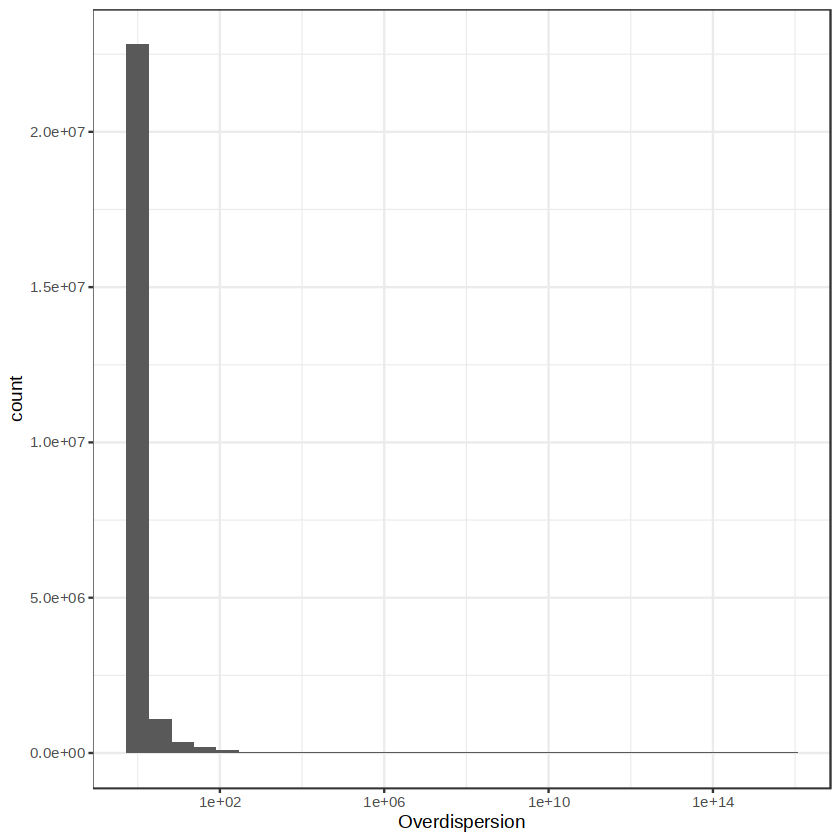

In [17]:
pred_means_2 <- apply(pred_means, 1, function(u) u/overdisps$nb1)
ggplot(data=NULL, aes(x=as.numeric(pred_means_2)+1),after_stat(density)) + 
geom_histogram()+
scale_x_log10()+
theme_bw()+xlab("Overdispersion")

In [18]:
pred_means_2_jc = as.matrix(t(pred_means/repmat(t(as.matrix(overdisps$nb1)), nrow(pred_means),1)))

In [19]:
pred_means_2_jc

E1_E1CD3col4_CATTTGTGCTTG E1_E1CD3col2_AGAATAAGTCAC
TPM1        7.13511960                4.68867147              
MALAT1     28.39536395               19.12986823              
EMC10               NA                        NA              
MYL7        2.17876986                1.35865470              
VIM         2.10030553                1.33703953              
HIST1H4C   37.95751948               28.01154389              
TMSB4X     36.68289578               27.52069370              
ANKRD1      1.01391067                0.61735104              
TNNT2               NA                        NA              
L1TD1      11.10260120                8.97383047              
MYH6                NA                        NA              
HIST1H1D   34.33347702               25.53335664              
MIR302CHG  20.13706918               16.22555959              
ACTC1       0.66411755                0.40811333              
TTN         0.79533667                0.49751629              
MT-RNR1    25.54428665               18.71762975              
AC020909.2          NA                        NA              
MT-ND4L    17.61518667               12.80356187              
TAGLN       5.33341521                3.56566549              
MYL4        0.13782487                0.08272690              
TNNI1       0.08793095                0.05247967              
MT-CYB     17.27375065               12.59794928              
MT-ND5     16.02489628               11.54653712              
MDK         2.17080762                1.48694706              
MT-ND4     18.70542079               13.65223820              
NEBL        0.15942651                0.09762520              
CENPF      12.25551383                9.02324295              
HIST1H1E   15.13237303               11.08612607              
MT-CO3     12.52323746                9.20343367              
CRABP2      4.15913066                2.86742416              
⋮          ⋮                         ⋮                        
RPL31P59   5.306877e-04              3.858593e-04             
AC009120.1 2.306237e-04              1.588697e-04             
LINC00595  4.356987e-02              2.771320e-02             
AC040160.1 4.402511e-04              3.140601e-04             
AL391834.2 3.433499e-04              2.355064e-04             
DYNLL1P7   5.787366e-04              4.209660e-04             
AL592437.1 6.360011e-04              4.767043e-04             
P2RY6      4.641562e-04              3.185062e-04             
AL500527.1 1.542374e+01              1.045782e+01             
TRABD2B    1.105235e-01              7.780058e-02             
CACNB1     1.909262e-04              1.317709e-04             
HBA1       5.393245e+00              4.024559e+00             
AC022558.1 2.774148e-01              1.966078e-01             
AC107890.1 9.567489e-02              7.184848e-02             
AC015720.2 5.406064e-04              3.883180e-04             
KCTD16     2.194045e-01              1.472189e-01             
AC093635.1 6.333986e-01              4.480163e-01             
RGN        4.080269e-01              2.928589e-01             
SOX17      1.083475e+00              7.278740e-01             
ST13P10    4.049853e-04              2.860677e-04             
ZNF324B    1.613977e-04              1.108171e-04             
MUC20      8.520769e+01              5.938629e+01             
EIF3LP3    5.613917e-04              4.093022e-04             
NECAB2     5.797209e-04              4.182772e-04             
SLC38A3    8.174939e-04              5.742744e-04             
TMEM200C   3.055722e-01              2.143530e-01             
AC010460.3 5.163679e-04              3.737193e-04             
PIGZ       7.198105e-04              5.096630e-04             
LGI1       4.582381e-01              3.167502e-01             
BRD7P5     2.565637e-04              1.829203e-04             
           E2_E2CD2col5_ATGAATGATGAA E2_E2CD1col1_TGACGCGCCGGT
TPM1        7.13198389               0.817

In [20]:
pred_means_2

E1_E1CD3col4_CATTTGTGCTTG E1_E1CD3col2_AGAATAAGTCAC
TPM1        7.13511960                4.68867147              
MALAT1     28.39536395               19.12986823              
EMC10               NA                        NA              
MYL7        2.17876986                1.35865470              
VIM         2.10030553                1.33703953              
HIST1H4C   37.95751948               28.01154389              
TMSB4X     36.68289578               27.52069370              
ANKRD1      1.01391067                0.61735104              
TNNT2               NA                        NA              
L1TD1      11.10260120                8.97383047              
MYH6                NA                        NA              
HIST1H1D   34.33347702               25.53335664              
MIR302CHG  20.13706918               16.22555959              
ACTC1       0.66411755                0.40811333              
TTN         0.79533667                0.49751629              
MT-RNR1    25.54428665               18.71762975              
AC020909.2          NA                        NA              
MT-ND4L    17.61518667               12.80356187              
TAGLN       5.33341521                3.56566549              
MYL4        0.13782487                0.08272690              
TNNI1       0.08793095                0.05247967              
MT-CYB     17.27375065               12.59794928              
MT-ND5     16.02489628               11.54653712              
MDK         2.17080762                1.48694706              
MT-ND4     18.70542079               13.65223820              
NEBL        0.15942651                0.09762520              
CENPF      12.25551383                9.02324295              
HIST1H1E   15.13237303               11.08612607              
MT-CO3     12.52323746                9.20343367              
CRABP2      4.15913066                2.86742416              
⋮          ⋮                         ⋮                        
RPL31P59   5.306877e-04              3.858593e-04             
AC009120.1 2.306237e-04              1.588697e-04             
LINC00595  4.356987e-02              2.771320e-02             
AC040160.1 4.402511e-04              3.140601e-04             
AL391834.2 3.433499e-04              2.355064e-04             
DYNLL1P7   5.787366e-04              4.209660e-04             
AL592437.1 6.360011e-04              4.767043e-04             
P2RY6      4.641562e-04              3.185062e-04             
AL500527.1 1.542374e+01              1.045782e+01             
TRABD2B    1.105235e-01              7.780058e-02             
CACNB1     1.909262e-04              1.317709e-04             
HBA1       5.393245e+00              4.024559e+00             
AC022558.1 2.774148e-01              1.966078e-01             
AC107890.1 9.567489e-02              7.184848e-02             
AC015720.2 5.406064e-04              3.883180e-04             
KCTD16     2.194045e-01              1.472189e-01             
AC093635.1 6.333986e-01              4.480163e-01             
RGN        4.080269e-01              2.928589e-01             
SOX17      1.083475e+00              7.278740e-01             
ST13P10    4.049853e-04              2.860677e-04             
ZNF324B    1.613977e-04              1.108171e-04             
MUC20      8.520769e+01              5.938629e+01             
EIF3LP3    5.613917e-04              4.093022e-04             
NECAB2     5.797209e-04              4.182772e-04             
SLC38A3    8.174939e-04              5.742744e-04             
TMEM200C   3.055722e-01              2.143530e-01             
AC010460.3 5.163679e-04              3.737193e-04             
PIGZ       7.198105e-04              5.096630e-04             
LGI1       4.582381e-01              3.167502e-01             
BRD7P5     2.565637e-04              1.829203e-04             
           E2_E2CD2col5_ATGAATGATGAA E2_E2CD1col1_TGACGCGCCGGT
TPM1        7.13198389               0.817

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 82100 rows containing non-finite values (stat_bin).”


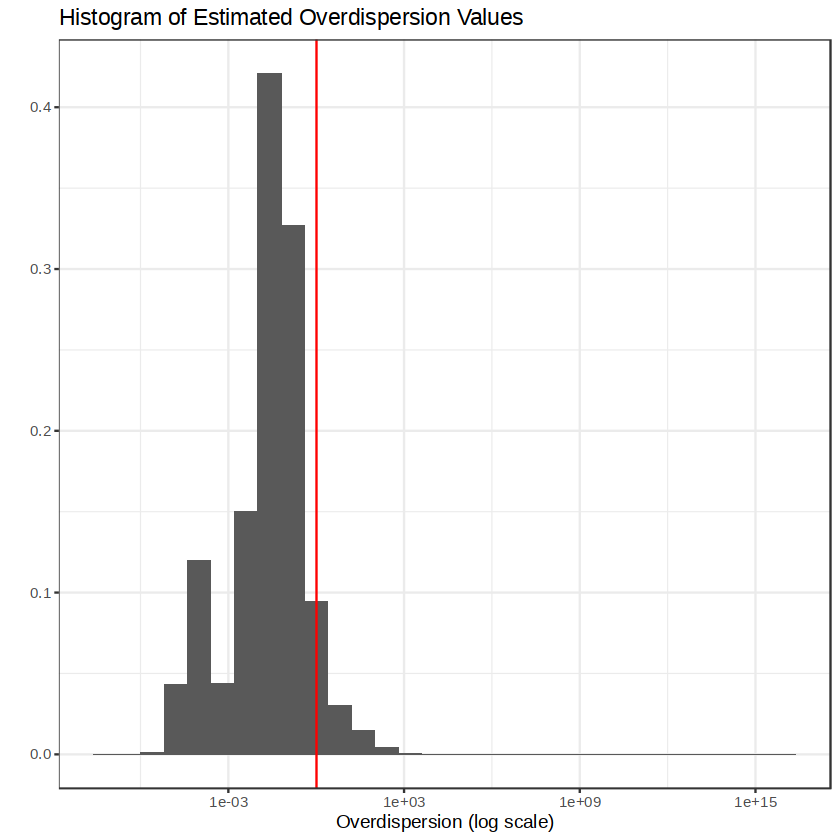

In [21]:
set.seed(1)
### Use random indices to avoid crashing the computer. 
randomindices <- sample(1:length(as.numeric(pred_means)), size=5e6)

ggplot(data=NULL, aes(x=as.numeric(t(pred_means_2))[randomindices], y=..density..))+
geom_histogram()+scale_x_log10()+theme_bw()+
geom_vline(xintercept=1, col="red")+
xlab("Overdispersion (log scale)")+
ylab("")+
ggtitle("Histogram of Estimated Overdispersion Values")